## Module 1: Loading Data on a Map
In this practice you will load data from a GeoJSON file and display the data on multiple map projections. The goal is to get more familiar with the different projections and how to reproject data. 

This practice will use the [usa-state-capitals.geojson](../../resources/data/usa-state-capitals.geojson) file that was used previously in the data storage lab. 

In [70]:
import numpy as np
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

## Load GeoJSON

Load the data file into geoPandas dataframe and explore it.

In [73]:
df = gpd.read_file("../../resources/data/usa-state-capitals.geojson")


Display the geometry type and total bounds for the data

In [81]:
# Add your code below this comment 
# ----------------------------------
#print(df.geom_type)

print(df.total_bounds)

df.crs

(-157.82618199999999, 21.308949999999999, -69.765260999999995, 58.301935)


{'init': 'epsg:4326'}

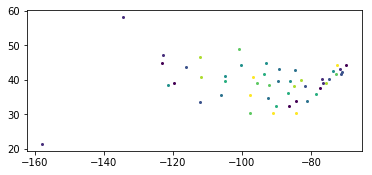

In [75]:
df.plot()

## Display the data on a map

Display the data on a **Web Mercator** projections

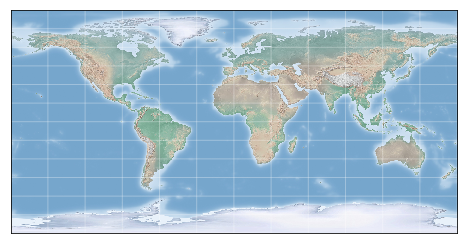

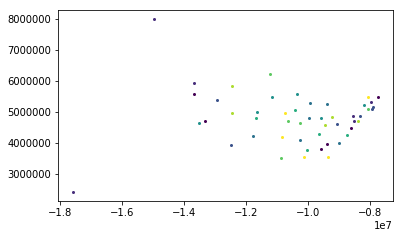

In [88]:
fig, ax= plt.subplots(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)
df_merc = df.to_crs(epsg=3395)
df_merc.plot()


Display the data on a **Conic** projections

TypeError: map() must have at least two arguments.

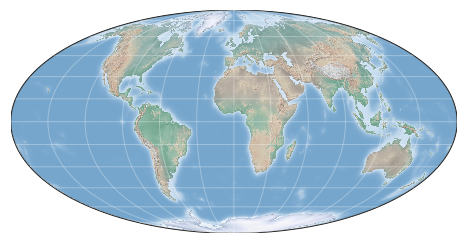

In [77]:
# Add your code below this comment 
# ----------------------------------
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

x.y = map(df.geometry)
    

ax.add_collection(PatchCollection(patches, match_original=True))